In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

import joblib
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

In [2]:
data=pd.read_csv("../data/processed/data_milk_c.csv",
                 index_col=0)
X=data.drop(columns=['Grade','Grade_sparse']).values
y=data['Grade_sparse'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

print(f"Train shape {X_train.shape}")
print(f"Test shape {X_test.shape}")

Train shape (58, 7)
Test shape (25, 7)


In [3]:
model=joblib.load('../models/gnbayes.joblib')

In [4]:
y_pred=model.predict(X_test)

print(f"Predictions {y_pred[:5]}")

Predictions [1 0 2 2 2]


In [5]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[7 0 1]
 [0 7 0]
 [0 1 9]]


<Figure size 1000x1000 with 0 Axes>

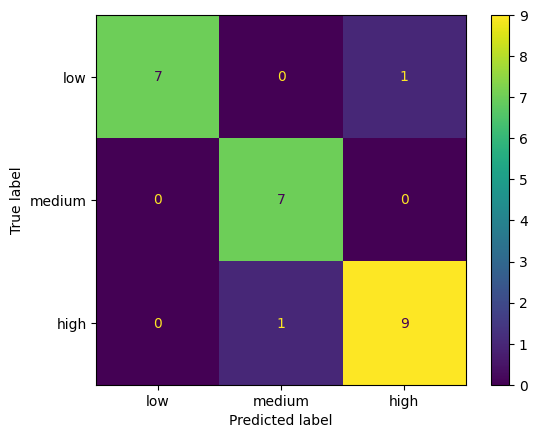

In [27]:
plt.figure(figsize=(10,10))
disp=ConfusionMatrixDisplay(cm,display_labels=['low','medium','high'])
disp.plot()
plt.savefig("../reports/ConfusionMatrix.png",dpi=300,bbox_inches='tight')
plt.show()

In [9]:
heatmap = go.Heatmap(z=cm, x=['0', '1', '2'], y=['0', '1', '2'], colorscale='Blues')

# create the layout
layout = go.Layout(title='Confusion Metrix')

# create the figure
fig = go.Figure(data=[heatmap], layout=layout)

# show the figure
fig.show()

In [7]:
import plotly.io as pio
fig = px.imshow(cm, 
                text_auto=True,
                labels=dict(x="Predicted label", y="True label", color="Samples"),
                x=['low','medium','high'],
                y=['low','medium','high'],
                height=500,
                width=600,
                template='plotly_dark')
pio.write_image(fig, 
                '../reports/plotly_cm.png',
                scale=2)

pio.write_html(fig,
               '../reports/plotly_cm.html',
                full_html=False)
fig.show()

In [31]:
report=classification_report(y_test,y_pred,target_names=['low','medium','high'])
print(report)

              precision    recall  f1-score   support

         low       1.00      0.88      0.93         8
      medium       0.88      1.00      0.93         7
        high       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [45]:
report_dict=classification_report(y_test,
                                  y_pred,
                                  target_names=['low','medium','high'],
                                  output_dict=True,
                                  digits=2)
report_dict.update({"accuracy": {"precision": None, "recall": None, "f1-score": report_dict["accuracy"], "support": report_dict['macro avg']['support']}})
report_df=pd.DataFrame.from_dict(report_dict).round(2)
report_df=report_df.fillna('')

report_df.to_csv("../reports/creport.csv")

In [5]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.io as pio

cr_test=pd.read_csv(r"..\reports\creport.csv",
                        index_col=0)
cr_test=cr_test.fillna(value='')
cr_fig2 = ff.create_table(cr_test.T, index=True)
cr_fig2.update_layout(
    title_text="<b>Classification report (Test)</b>",
    margin = {'t':50, 'b':10,'l':10,'r':10},
    height=300,
    width=550,template='plotly_dark'
)
cr_fig2.show()
pio.write_image(cr_fig2, 
                '../reports/cr_test.png',
                scale=1)